## End Term Project
## TELECOM CUSTOMERS CHURN DATA SET

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import nltk#Natural Language Tool Kit
 
import sklearn#Scikit

import re
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer

#!pip install spacy
import spacy

#Visualisation
import gensim
from gensim import corpora

In [2]:
%pwd

'C:\\Users\\Subhasmita Purohit\\Documents\\SubhasmitasPROJECT'

In [3]:
%cd F:\BA\Term 5\BA in action

F:\BA\Term 5\BA in action


In [4]:
#tele is a variable in which i stored the telecom customers churn data set
tele=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",sep=",")
#display
tele

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Description
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month is called Churn
Services that each customer has signed up for are phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Account information of customers how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, and if they have partners and dependents

In [5]:
#to check the size-rows and columns
tele.shape

(7043, 21)

In [6]:
#details information type of the features and null values
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
#to chech the columns name and if required we can convert the upper case alphate to lower case and remove the space betweeen 2 words 
tele.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#check if null values are there
tele.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#there are some space and missing vale to standardized 
missing_values=['na','--','n/a','Unknown',' ','  ']
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=missing_values)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
#TO convert the columns name to lower case
df.columns=map(str.lower,tele.columns)

In [11]:
#cross check all should conerted in to lower case
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

#### Details about each Features

In [12]:
# unique ID of the data set
df['customerid']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerid, Length: 7043, dtype: object

In [13]:
df=df.drop(columns="customerid")

In [14]:
#Wwe can find out the percentage of male/feame of the sample population
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

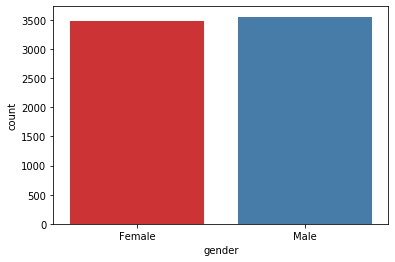

In [15]:
#visualization
sns.countplot(x='gender',data=df,palette="Set1")#no major difference in %

In [16]:
df['totalcharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [17]:
df['totalcharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: totalcharges, Length: 6530, dtype: int64

In [18]:
df['totalcharges'].isnull().sum()

11

In [19]:
df.head(50)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [20]:
df['multiplelines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

In [21]:
df['seniorcitizen'].value_counts()

0    5901
1    1142
Name: seniorcitizen, dtype: int64

In [22]:
df['internetservice'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

In [23]:
df['onlinesecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: onlinesecurity, dtype: int64

In [24]:
df['deviceprotection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: deviceprotection, dtype: int64

In [25]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

### Data Manipulation

In [26]:
df["multiplelines"] = df["multiplelines"].replace({"No phone service":""})
df["multiplelines"].value_counts()

No     3390
Yes    2971
        682
Name: multiplelines, dtype: int64

In [27]:
df["onlinesecurity"] = df["onlinesecurity"].replace({"No internet service":"No"})
df["onlinesecurity"].value_counts()

No     5024
Yes    2019
Name: onlinesecurity, dtype: int64

In [28]:
df['deviceprotection']=df["deviceprotection"].replace({"No internet service":"No"})
df["deviceprotection"].value_counts()

No     4621
Yes    2422
Name: deviceprotection, dtype: int64

In [29]:
df["techsupport"]=df["techsupport"].replace({"No internet service":"No"})
df["streamingtv"]=df["streamingtv"].replace({"No internet service":"No"})
df["streamingmovies"]=df["streamingmovies"].replace({"No internet service":"No"})

In [30]:
#drop the null values of total charges column
df=df[df["totalcharges"].notnull()]
df=df.reset_index()[df.columns]

In [31]:
#cross check
df['totalcharges'].isnull().sum()

0

In [32]:
type(df['totalcharges'])

pandas.core.series.Series

## Analysis

In [33]:
df['totalcharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: totalcharges, dtype: float64

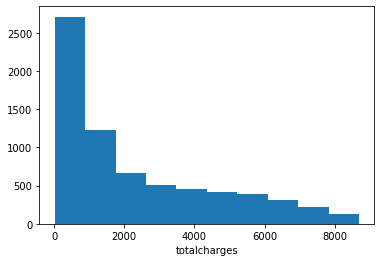

In [34]:
plt.xlabel('totalcharges') #xlable is use tolable the axis
plt.hist(df['totalcharges'])
plt.show()

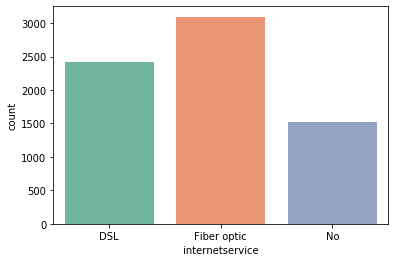

In [35]:
#Whch Internet service mostly provied by the telecom department?
sns.countplot(x='internetservice',data=df, palette="Set2")

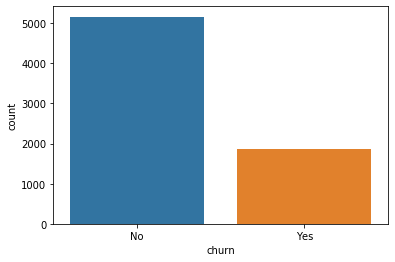

In [36]:
sns.countplot(x='churn',data=df)

## To find out the reason for customer churn

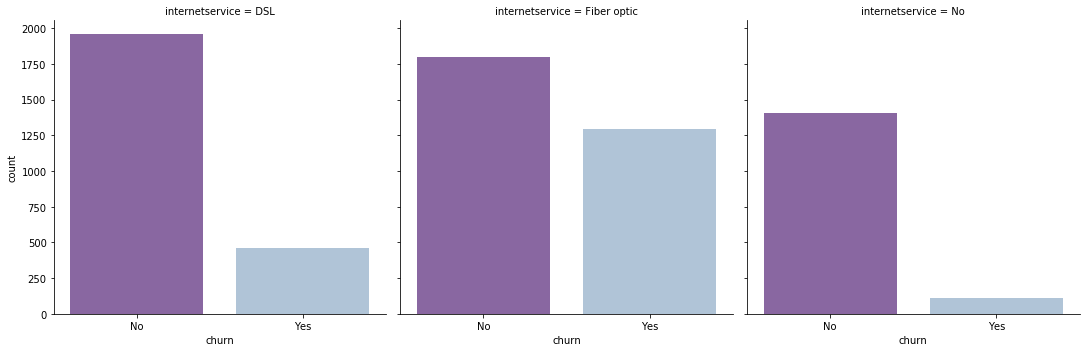

In [37]:
sns.catplot(x='churn',data=df,palette='BuPu_r',col='internetservice',kind='count')

In the telecom sector the customer churn rate of fiber optics user is high as compare to DSL and No .NO means some of the customer not using internet service and the less customers comes from this setor so it has a benifit of less customer churn rate.May be most of them are seniorcitizen lets check this also.

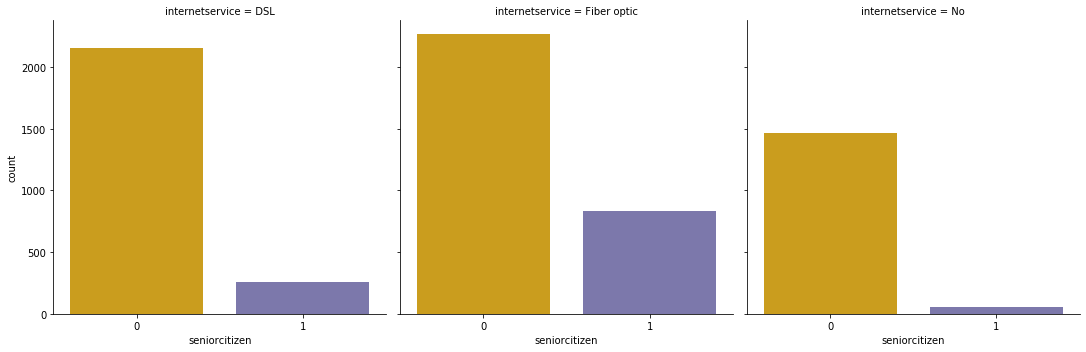

In [38]:
sns.catplot(x='seniorcitizen',data=df,palette='Dark2_r',col='internetservice',kind='count')

But here we can see that less customers are belong to the senior citizen who are not using internet services,So it is difficult say who actually leave. Other than that most of the customers uses fiber optics so the churn rate of customer who used fiber optics are high. 

In [39]:
df["churn"]=df["churn"].replace({"Yes":1,"No":0})

In [40]:
df['churn'].mean()

0.26578498293515357

From the total customers 26.57% of switch the teleome service

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender              7032 non-null object
seniorcitizen       7032 non-null int64
partner             7032 non-null object
dependents          7032 non-null object
tenure              7032 non-null int64
phoneservice        7032 non-null object
multiplelines       7032 non-null object
internetservice     7032 non-null object
onlinesecurity      7032 non-null object
onlinebackup        7032 non-null object
deviceprotection    7032 non-null object
techsupport         7032 non-null object
streamingtv         7032 non-null object
streamingmovies     7032 non-null object
contract            7032 non-null object
paperlessbilling    7032 non-null object
paymentmethod       7032 non-null object
monthlycharges      7032 non-null float64
totalcharges        7032 non-null float64
churn               7032 non-null int64
dtypes: float64(2), int64(3), object(15)
memory usage: 1.1+ MB


In [42]:
df.groupby(['techsupport','gender'])['churn'].mean()

techsupport  gender
No           Female    0.314762
             Male      0.309909
Yes          Female    0.161133
             Male      0.142717
Name: churn, dtype: float64

In [43]:
df.groupby(['internetservice','onlinesecurity'])['churn'].mean()

internetservice  onlinesecurity
DSL              No                0.279839
                 Yes               0.095238
Fiber optic      No                0.493576
                 Yes               0.218117
No               No                0.074342
Name: churn, dtype: float64

In [44]:
df.groupby(['techsupport','internetservice'])['churn'].mean()

techsupport  internetservice
No           DSL                0.277778
             Fiber optic        0.493722
             No                 0.074342
Yes          DSL                0.097104
             Fiber optic        0.226328
Name: churn, dtype: float64

In [45]:
df.groupby(['gender'])['churn'].mean()

gender
Female    0.269595
Male      0.262046
Name: churn, dtype: float64

In [46]:
examine=df.groupby(['totalcharges','monthlycharges'])['churn'].describe()

In [47]:
examine

,,count,mean,std,min,25%,50%,75%,max
totalcharges,monthlycharges,,,,,,,,
18.80,18.80,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
18.85,18.85,2.0,0.5,0.707107,0.0,0.25,0.5,0.75,1.0
18.90,18.90,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
19.00,19.00,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
19.05,19.05,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
8564.75,116.25,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
8594.40,116.95,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0
8670.10,117.50,1.0,0.0,NaN,0.0,0.00,0.0,0.00,0.0


In [48]:
df.groupby(['gender','totalcharges','monthlycharges'])['churn'].describe()

count  mean       std  min   25%  50%  \
gender totalcharges monthlycharges                                          
Female 18.85        18.85             1.0   0.0       NaN  0.0  0.00  0.0   
       19.00        19.00             1.0   0.0       NaN  0.0  0.00  0.0   
       19.10        19.10             2.0   0.5  0.707107  0.0  0.25  0.5   
       19.15        19.15             1.0   0.0       NaN  0.0  0.00  0.0   
       19.25        19.25             2.0   0.0  0.000000  0.0  0.00  0.0   
...                                   ...   ...       ...  ...   ...  ...   
Male   8468.20      114.05            1.0   0.0       NaN  0.0  0.00  0.0   
       8547.15      118.20            1.0   0.0       NaN  0.0  0.00  0.0   
       8564.75      116.25            1.0   0.0       NaN  0.0  0.00  0.0   
       8594.40      116.95            1.0   0.0       NaN  0.0  0.00  0.0   
       8684.80      117.80            1.0   1.0       NaN  1.0  1.00  1.0   

                                     75%  max  
gender totalcharges monthlycharges             
Female 18.85        18.85           0.00  0.0  
       19.00        19.00           0.00  0.0  
       19.10        19.10           0.75  1.0  
       19.15        19.15           0.00  0.0  
       19.25        19.25           0.00  0.0  
...                                  ...  ...  
Male   8468.20      114.05          0.00  0.0  
       8547.15      118.20          0.00  0.0  
       8564.75      116.25          0.00  0.0  
       8594.40      116.95          0.00  0.0  
       8684.80      117.80          1.00  1.0  

[6858 rows x 8 columns]

In [49]:
df.groupby(['gender','totalcharges','monthlycharges'])['churn'].mean()

gender  totalcharges  monthlycharges
Female  18.85         18.85             0.0
        19.00         19.00             0.0
        19.10         19.10             0.5
        19.15         19.15             0.0
        19.25         19.25             0.0
                                       ... 
Male    8468.20       114.05            0.0
        8547.15       118.20            0.0
        8564.75       116.25            0.0
        8594.40       116.95            0.0
        8684.80       117.80            1.0
Name: churn, Length: 6858, dtype: float64

In [50]:
df['totalcharges'].describe()#Huge range

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: totalcharges, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x39cbfaf2c8>,
 'caps': [<matplotlib.lines.Line2D at 0x39cbfaf508>,
 'boxes': [<matplotlib.lines.Line2D at 0x39cbfad5c8>],
 'medians': [<matplotlib.lines.Line2D at 0x39cbfb4e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x39cbfb6548>],
 'means': []}

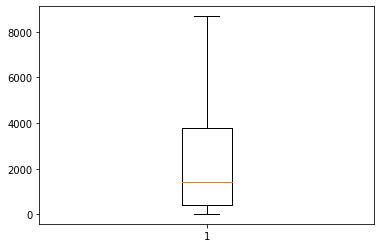

In [51]:
box=plt.boxplot(df['totalcharges'])#More thhan 75% data are in with in 18-4000 bucks
box

In [52]:
[item.get_ydata()[0]for item in box['caps']]

[18.8, 8684.8]

In [53]:
[item.get_ydata()[0]for item in box['whiskers']]

[401.45, 3794.7375]

In [54]:
[item.get_ydata()[0]for item in box['medians']]

[1397.475]

In [55]:
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,Female,0,Yes,Yes,11,No,,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


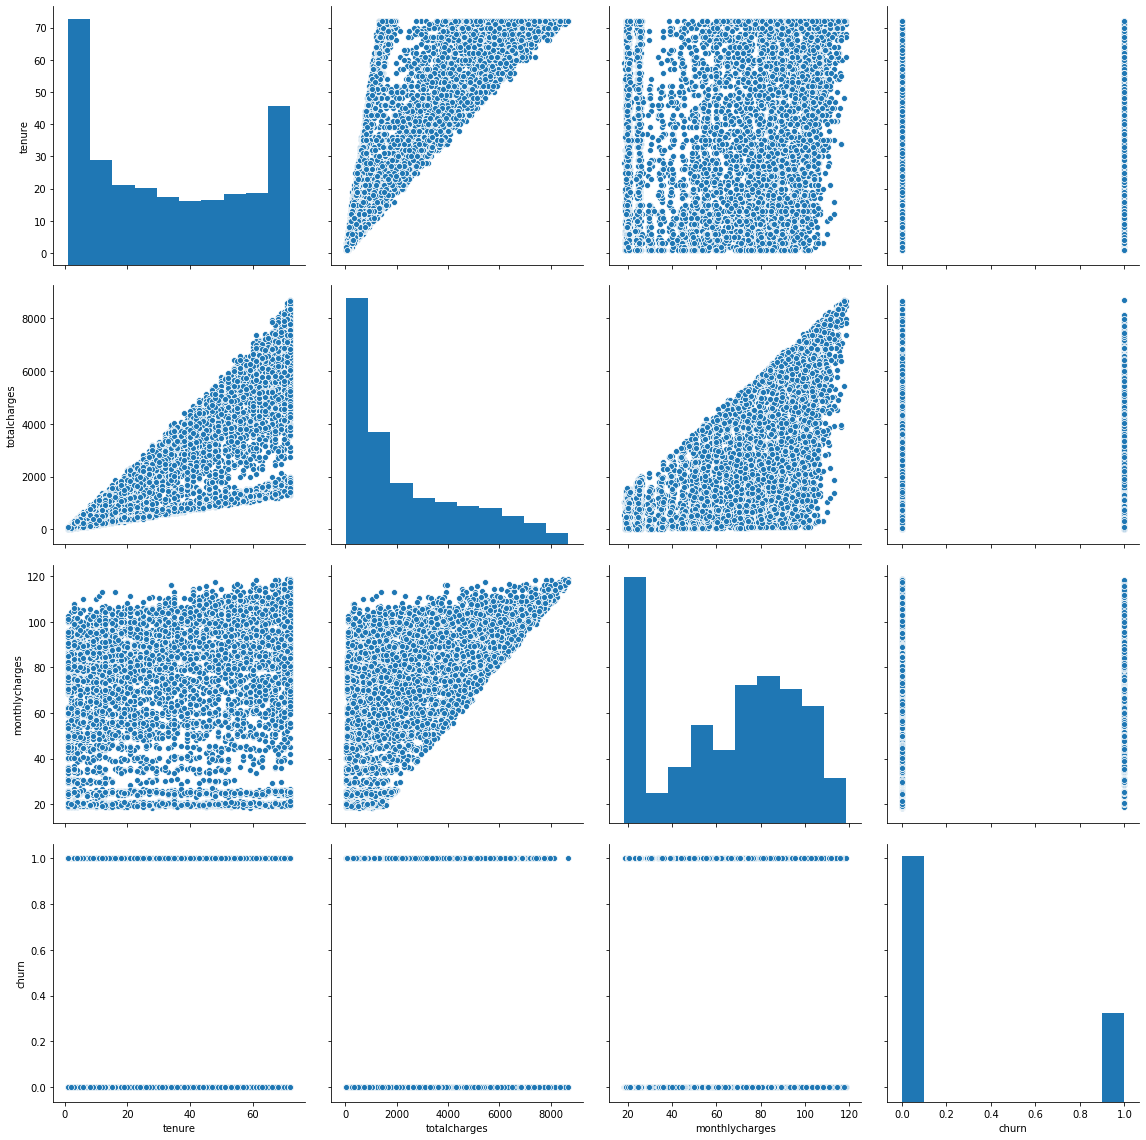

In [56]:
influential_features=['tenure','totalcharges','monthlycharges','churn']
sns.pairplot(df[influential_features],size=4)

## Encoding

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()
data=df.copy()
data.head(20)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [59]:
for i in data.columns[:-1]:
    data[i]=le.fit_transform(data[i])

data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,1,0,1,0,1,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,1,0,1,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,0,0,1,0,1,1,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,2,728,674,1


In [60]:
for i in data.columns:
    print(data[i].value_counts())

1    3549
0    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: seniorcitizen, dtype: int64
0    3639
1    3393
Name: partner, dtype: int64
0    4933
1    2099
Name: dependents, dtype: int64
0     613
71    362
1     238
2     200
3     176
     ... 
37     59
27     57
38     56
43     51
35     50
Name: tenure, Length: 72, dtype: int64
1    6352
0     680
Name: phoneservice, dtype: int64
1    3385
2    2967
0     680
Name: multiplelines, dtype: int64
1    3096
0    2416
2    1520
Name: internetservice, dtype: int64
0    5017
1    2015
Name: onlinesecurity, dtype: int64
0    3087
2    2425
1    1520
Name: onlinebackup, dtype: int64
0    4614
1    2418
Name: deviceprotection, dtype: int64
0    4992
1    2040
Name: techsupport, dtype: int64
0    4329
1    2703
Name: streamingtv, dtype: int64
0    4301
1    2731
Name: streamingmovies, dtype: int64
0    3875
2    1685
1    1472
Name: contract, dtype: int64
1    4168
0    2864
Name: paperlessbilling, dtype: int64
2    2365
3    16

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender              7032 non-null int32
seniorcitizen       7032 non-null int64
partner             7032 non-null int32
dependents          7032 non-null int32
tenure              7032 non-null int64
phoneservice        7032 non-null int32
multiplelines       7032 non-null int32
internetservice     7032 non-null int32
onlinesecurity      7032 non-null int32
onlinebackup        7032 non-null int32
deviceprotection    7032 non-null int32
techsupport         7032 non-null int32
streamingtv         7032 non-null int32
streamingmovies     7032 non-null int32
contract            7032 non-null int32
paperlessbilling    7032 non-null int32
paymentmethod       7032 non-null int32
monthlycharges      7032 non-null int64
totalcharges        7032 non-null int64
churn               7032 non-null int64
dtypes: int32(15), int64(5)
memory usage: 686.8 KB


In [62]:
data=data.drop(columns='churn')

## One-Hot Encoding

In [63]:
onehotencoder=OneHotEncoder(categorical_features='all')
encoded=onehotencoder.fit_transform(data).toarray()

C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:441: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


In [64]:
data_encoded=pd.DataFrame(encoded)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Columns: 8224 entries, 0 to 8223
dtypes: float64(8224)
memory usage: 441.2 MB


In [65]:
data_encoded['class']=df['churn']

In [66]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Columns: 8225 entries, 0 to class
dtypes: float64(8224), int64(1)
memory usage: 441.3 MB


In [67]:
data_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,8215,8216,8217,8218,8219,8220,8221,8222,8223,class
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Logistic Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [69]:
x=data_encoded.columns[:-1]
x_train,x_test,y_train,y_test=train_test_split(data_encoded[x],data_encoded['class'])

In [70]:
print(x_train.shape,y_train.shape)

(5274, 8224) (5274,)


In [71]:
print(y_train.shape,y_train.shape)

(5274,) (5274,)


In [72]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
predicted_class=model.predict(x_test)

In [74]:
accuracy=accuracy_score(y_test,predicted_class)
accuracy

0.7895335608646189

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
y_pred=model.predict(x_test)

In [77]:
confusionmatrix=confusion_matrix(y_test,y_pred)
confusionmatrix

array([[1156,  144],
       [ 226,  232]], dtype=int64)